# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [4]:
# Import the appropriate libraries with aliases
import pandas as pd

# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [5]:
#Code Used:
n_reps = north_df['Rep ID'].nunique()
print(n_reps)

9


#### EDA Question 1B:  How many reps are in the South branch?  

In [6]:
#Code Used:
s_reps = south_df['Rep ID'].nunique()
print(s_reps)

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
#Code Used:
north_busym = north_df[['Busy Minutes' ,'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()
print(north_busym)

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [8]:
#Code Used:
south_busym = south_df[['Busy Minutes' , 'Not Ready Minutes','Incoming Wait Time', 'During Call Wait Time']].mean()
print(south_busym)

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# Code Used:
all_df = pd.concat([north_df, south_df])
block_time = all_df['Time Block'].value_counts()
print(block_time)

12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Time Block, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9 
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.987755
> - Not Ready Minutes = 1.914286
> - Incoming Wait Time = 3.048780
> - During Call Wait Time = 2.967347
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.054140
> - Not Ready Minutes = 1.910828
> - Incoming Wait Time = 3.000000
> - During Call Wait Time = 3.076433
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: as I see in 'incoming call wait' for both data is missing I am giving 0 value to it.


In [10]:
# checking for missing value in north data set
north_df.fillna(value=0, inplace=True)
north_df.isnull().sum()

Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64

In [11]:
# checking for missing value in south data set
south_df.fillna(value=0, inplace=True)
south_df.isnull().sum()

Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: By analizing data in spreadsheet I found that one yes has space after it, by removing that space I fixed it.

In [12]:
#changing the value to a normal format:
north_df.Sale.replace('Yes ', 'Yes', inplace=True)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: there is no duplicate in this 2 data set.

In [13]:
#checking for duplicates
south_df.duplicated().sum()

0

In [14]:
#checking for duplicates
north_df.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: No there is no any unnecessary data. If there was any any unnecessary data i would use 'drop()' method to use 'drop()' method to handle it.

In [15]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [16]:
# Create dataframe for the entire company named df
df = pd.concat([south_df, north_df], axis=0)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,0.0,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,0.0,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,0.0,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,0.0,2,1


In [17]:
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- Brent North Branch = 37 
- Eric South Branch = 35


In [18]:
grouped = df.groupby(['Rep ID', 'Branch']).sum()

# Sort by Calls to determine which Rep in each Branch has the highest number of calls.
sorted_grouped = grouped.sort_values(['Branch', 'Calls'], ascending=[True, False])
highest_calls = sorted_grouped.groupby('Branch').head(1)

# Display the result
print(highest_calls)

               Unnamed: 0  Lost Call  Abandoned  Busy Minutes  \
Rep ID Branch                                                   
Brent  North         4840          0          1           362   
Eric   South         5039          0          0           361   

               Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Rep ID Branch                                                                 
Brent  North                  71                17.0                    117   
Eric   South                  54                47.0                    112   

               Calls  
Rep ID Branch         
Brent  North      37  
Eric   South      35  


In [19]:
#Group by Rep ID and sum the resulting structure
grouped = df.groupby(['Rep ID', 'Branch']).sum()
# Sort by calls to determine which rep in each branch has the highest number of calls.
sorted_grouped = grouped.sort_values('Calls', ascending=False)
sorted_grouped

,,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,,
Brent,North,4840,0,1,362,71,17.0,117,37
Eric,South,5039,0,0,361,54,47.0,112,35
Randy,South,4576,3,1,320,66,47.0,98,33
Sandy,South,4694,1,0,325,60,34.0,100,32
Helga,South,5236,0,2,292,58,36.0,95,31
Lilly,North,3375,0,2,307,59,37.0,88,30
Todd,North,4252,1,0,296,58,21.0,97,29
Duke,North,2999,2,0,292,56,39.0,85,29
George,South,4620,0,0,298,53,41.0,87,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85
- South Branch = 1.27
- Company Wide = 1.98
- Do any of these fall out of the optimal range of 2-5%? Yes South and company wide fall out of the optimal range of 2-5% but not North

In [20]:
# calculate call abandonment rate for each branch
branch_abandonment_rates = df.groupby("Branch")["Abandoned"].sum() / df.groupby("Branch")["Calls"].sum() * 100

# calculate call abandonment rate for the whole company
company_abandonment_rate = df["Abandoned"].sum() / df["Calls"].sum() * 100

# print results
print( branch_abandonment_rates)
print( company_abandonment_rate)

Branch
North    2.857143
South    1.273885
dtype: float64
1.9677996422182469


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch =  40.24/ 29 calls
- South Branch = 38.09/ 32 calls
- Company Wide = 38.94


In [21]:
# Calculate service level percentage by branch
incoming_calls = df[df['Incoming or Outgoing'] == 'Incoming']
branch_service_level = (incoming_calls[incoming_calls['Incoming Wait Time'] <= 2].groupby('Branch')['Calls'].sum() / incoming_calls.groupby('Branch')['Calls'].sum()) * 100

print('Service level percentage by branch:')
print(branch_service_level)

# Calculate service level percentage for the entire company
company_service_level = (incoming_calls[incoming_calls['Incoming Wait Time'] <= 2]['Calls'].sum() / incoming_calls['Calls'].sum()) * 100

print('Service level percentage for the entire company:')
print(company_service_level)

Service level percentage by branch:
Branch
North    40.243902
South    38.095238
Name: Calls, dtype: float64
Service level percentage for the entire company:
38.94230769230769


In [22]:
# Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

# Record your answer by double clicking here:

# Average speed of answer (rounded to nearest hundredth):

# North Branch in seconds = 3.05
# South Branch in seconds = 3.0
# Company Wide in seconds = 3.02



In [23]:
# Code Used 
# Average speed of answer for North branch
north_incoming_wait_time = north_df[north_df['Incoming or Outgoing'] == 'Incoming']['Incoming Wait Time'].sum()
north_incoming_calls = north_df[north_df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum()
north_avg_speed_of_answer = round(north_incoming_wait_time / north_incoming_calls, 2)

# Average speed of answer for South branch
south_incoming_wait_time = south_df[south_df['Incoming or Outgoing'] == 'Incoming']['Incoming Wait Time'].sum()
south_incoming_calls = south_df[south_df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum()
south_avg_speed_of_answer = round(south_incoming_wait_time / south_incoming_calls, 2)

# Average speed of answer for the entire company
combined_incoming_wait_time = df[df['Incoming or Outgoing'] == 'Incoming']['Incoming Wait Time'].sum()
combined_incoming_calls = df[df['Incoming or Outgoing'] == 'Incoming']['Calls'].sum()
company_avg_speed_of_answer = round(combined_incoming_wait_time / combined_incoming_calls, 2)

print(f"North Branch in seconds = {north_avg_speed_of_answer}")
print(f"South Branch in seconds = {south_avg_speed_of_answer}")
print(f"Company Wide in seconds = {company_avg_speed_of_answer}")

North Branch in seconds = 3.05
South Branch in seconds = 3.0
Company Wide in seconds = 3.02


# Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

*NOTE Some questions you may decide to use more than one chart and or chart style.

Visualization 1: What is the average abandonment rate per queue?

Record your answer by double clicking here:

Chart style you chose and why: I chose a horizontal bar chart because it is a clear and effective way to show comparisons between different categories.


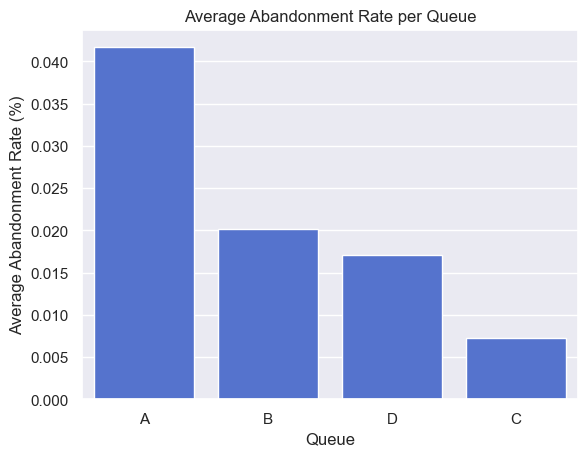

In [24]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
abandonment_queue = df.groupby("Queue")["Abandoned"].mean().sort_values(ascending=False)
# print(abandonment_queue)

# set style
sns.set(style="darkgrid")

# create bar chart
ax = sns.barplot(x=abandonment_queue.index, y=abandonment_queue.values, color="royalblue")

# set title
ax.set_title("Average Abandonment Rate per Queue")

# set x-axis label
ax.set_xlabel("Queue")

# set y-axis label
ax.set_ylabel("Average Abandonment Rate (%)")

# display chart
plt.show()

Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
Record your answer by double clicking here: 
Service Level %  Avg Speed of Answer (sec)
Rep ID                                            
Amanda        60.000000                   2.400000
Andy          30.000000                   3.600000
Brent         75.000000                   2.125000
Cam           45.454545                   2.909091
Duke          42.857143                   2.785714
Joe           20.000000                   3.600000
Lilly         33.333333                   3.083333
Todd          33.333333                   3.500000
Xander        33.333333                   3.333333

In [25]:
north_df = df[df["Branch"] == "North"]
incoming_calls = north_df[north_df["Incoming or Outgoing"] == "Incoming"]

quick_calls = incoming_calls[incoming_calls["Incoming Wait Time"] <= 2.0]
quick_stats = quick_calls.groupby("Rep ID")["Calls"].sum()

total_stats = incoming_calls.groupby("Rep ID")["Calls"].sum()
service_level = (quick_stats / total_stats) * 100
avg_speed_of_answer = incoming_calls.groupby("Rep ID")["Incoming Wait Time"].mean()
north_stats = pd.DataFrame({
    "Service Level %": service_level,
    "Avg Speed of Answer (sec)": avg_speed_of_answer
})
print(north_stats)

        Service Level %  Avg Speed of Answer (sec)
Rep ID                                            
Amanda        60.000000                   2.400000
Andy          30.000000                   3.600000
Brent         75.000000                   2.125000
Cam           45.454545                   2.909091
Duke          42.857143                   2.785714
Joe           20.000000                   3.600000
Lilly         33.333333                   3.083333
Todd          33.333333                   3.500000
Xander        33.333333                   3.333333


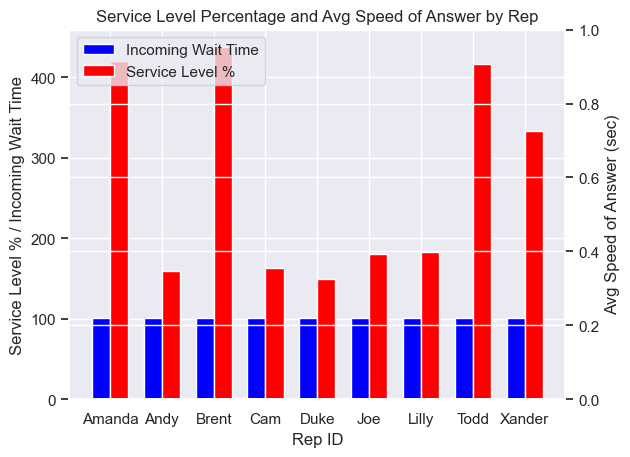

In [61]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
# Merge the north_plt and service_level dataframes
north_stats = pd.merge(north_plt, service_level, on="Rep ID")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


# set the width of the bars
bar_width = 0.35

# create an array of x-axis positions for the bar chart
x = np.arange(len(north_stats))

# plot the incoming wait time as a bar chart
# ax1.bar(x, north_stats["Incoming Wait Time"], color="blue", width=bar_width, label="Incoming Wait Time")

ax1.bar(x, north_stats["Incoming Wait Time"]+100, color="blue", width=bar_width, label="Incoming Wait Time")

# plot the service level percentage as a bar chart
ax1.bar(x + bar_width, north_stats["Service Level %"], color="red", width=bar_width, label="Service Level %")

# set the chart title and labels for x-axis and y-axis
plt.title("Service Level Percentage and Avg Speed of Answer by Rep")
ax1.set_xlabel("Rep ID")
ax1.set_ylabel("Service Level % / Incoming Wait Time")
ax2.set_ylabel("Avg Speed of Answer (sec)")

# set the x-axis tick positions and labels
plt.xticks(x + bar_width/2, north_stats["Rep ID"])

# rotate the x-axis labels for better visibility
plt.xticks(rotation=45)


# add a legend
ax1.legend(loc="upper left")

# show the chart
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: The stacked bar chart is a useful way to visualize the composition of a total number, as it allows you to see how the different parts contribute to the whole.

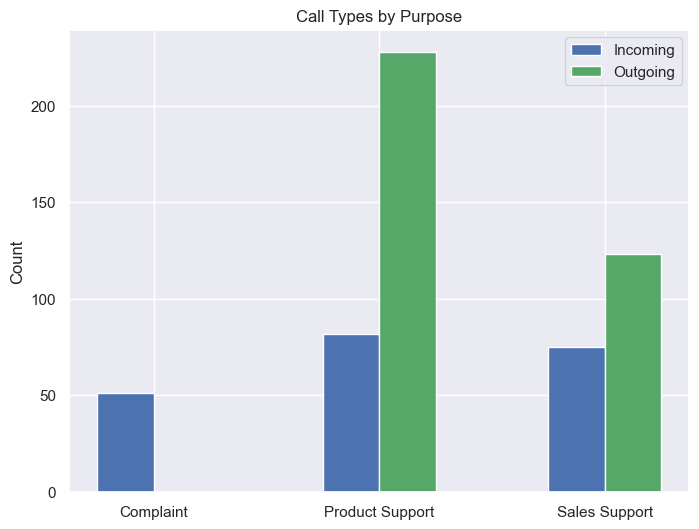

In [29]:
#Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

import matplotlib.pyplot as plt

# Group the calls by purpose and type (incoming or outgoing)
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_group = df.groupby("Call Purpose")["Incoming or Outgoing"].value_counts()

# Create dictionaries for the counts of each type of call for each purpose
complaints = {k:v for (k,v) in purpose_group["Complaint"].items()}
sales_support = {k:v for (k,v) in purpose_group["Sales Support"].items()}
product_support = {k:v for (k,v) in purpose_group["Product Support"].items()}

# Create a bar chart to visualize the counts of each type of call for each purpose
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.25

incoming_vals = [complaints.get(("Incoming"), 0), 
                 product_support.get(("Incoming"), 0), 
                 sales_support.get(("Incoming"), 0)]
outgoing_vals = [complaints.get(("Outgoing"), 0), 
                 product_support.get(("Outgoing"), 0), 
                 sales_support.get(("Outgoing"), 0)]

x_pos = [i for i in range(len(call_purpose))]
ax.bar(x_pos, incoming_vals, width=bar_width, color='b', align='center', label='Incoming')
ax.bar([i + bar_width for i in x_pos], outgoing_vals, width=bar_width, color='g', align='center', label='Outgoing')
plt.xticks([i + bar_width/2 for i in x_pos], call_purpose)
plt.ylabel('Count')
plt.title('Call Types by Purpose')
plt.legend()
plt.show()

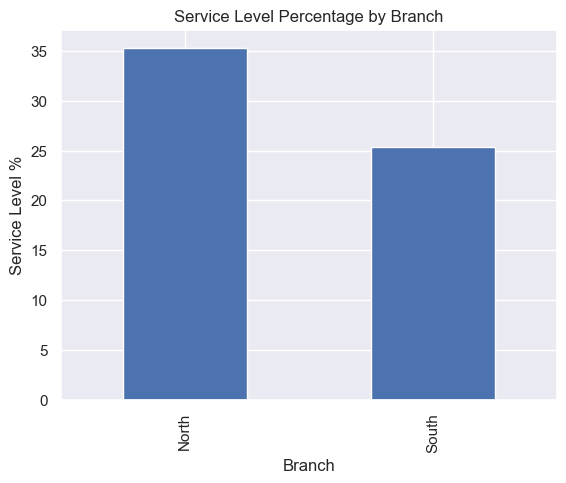

In [30]:
df_incoming = df[df["Incoming or Outgoing"] == "Incoming"]
branch_service = df_incoming[df_incoming["During Call Wait Time"] <= 2].groupby("Branch")["Calls"].sum() / df_incoming.groupby("Branch")["Calls"].sum() * 100

# plot the bar chart
branch_service.plot(kind="bar")

# set the chart title and labels for x-axis and y-axis
plt.title("Service Level Percentage by Branch")
plt.xlabel("Branch")
plt.ylabel("Service Level %")

# show the chart
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
North Branch operating more efficiently, higher service level percentage of the North Branch suggests that they are doing a better job at meeting their customers' needs and expectations.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: North Branch


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: in my opinion data has needed columns.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

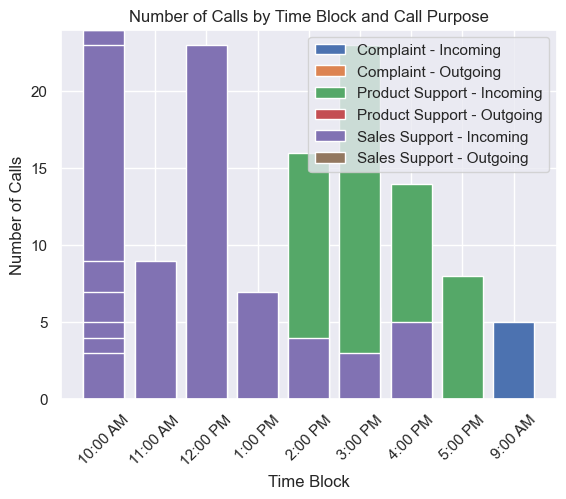

In [31]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
call_times_grouped = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"]).sum()
grouped_calls = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"]).sum().reset_index()

# Use groupby and get_group to select which call purpose to plot:
for call_purpose in grouped_calls["Call Purpose"].unique():
    # create a new dataframe with only the current call purpose
    purpose_data = grouped_calls[grouped_calls["Call Purpose"] == call_purpose]
    
    # create a bar chart for incoming calls
    incoming_data = purpose_data[purpose_data["Incoming or Outgoing"] == "Incoming"]
    outgoing_data = purpose_data[purpose_data["Incoming or Outgoing"] == "Outgoing"]
    outgoing_data = outgoing_data.reindex(index=incoming_data.index, fill_value=0)
    plt.bar(incoming_data["Time Block"], incoming_data["Calls"], label=f"{call_purpose} - Incoming")
    
    # create a bar chart for outgoing calls
    plt.bar(outgoing_data["Time Block"], outgoing_data["Calls"], label=f"{call_purpose} - Outgoing", bottom=incoming_data["Calls"])
    
# set the chart title and labels for x-axis and y-axis
plt.title("Number of Calls by Time Block and Call Purpose")
plt.xlabel("Time Block")
plt.ylabel("Number of Calls")

# rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# add a legend to the chart
plt.legend()

# show the chart
plt.show()